<p>1. Consider any dataset that has more than two class labels. You can create your own or download any publicly available dataset.</p>

<p>(a) Perform K-Means Clustering selecting the best value of k and taking Euclidean distance as similarity measure. Check your algorithm with the following two conditions.</p>

    i. Maximum number of iterations
    ii. Highest quality of cluster is reached.
    
<p>(b) Perform K-Means Clustering selecting the best value of k and taking Manhattan distance as similarity measure. Check your algorithm with the following two conditions.</p>

    i. Maximum number of iterations
    ii. Highest quality of cluster is reached.

<b>used dataset link [Mall_Customers.csv]  (https://drive.google.com/file/d/1Ujf--jIwfubdagZO2F3PLdlZqVzNCMKI/view?usp=sharing).

### Importing Libraries

In [1]:
#!pip install yellowbrick
#!pip install pyclustering

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore')

# sklearn kmeans
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

# pyclustering kmeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric, type_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

In [3]:
# Importing the dataset

url = 'https://drive.google.com/file/d/1Ujf--jIwfubdagZO2F3PLdlZqVzNCMKI/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data=pd.read_csv(path)
data.head()

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Importing the dataset
#data = pd.read_csv('Mall_Customers.csv')
#data.head()

In [5]:
# checking shape of data
data.shape

(200, 5)

In [6]:
# checking if any null value is there or not
data.isnull().sum()

CustomerID            0
Gender                0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [7]:
# checking data types of each feature
data.dtypes

CustomerID             int64
Gender                object
Age                    int64
Annual_Income_(k$)     int64
Spending_Score         int64
dtype: object

In [8]:
data.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
# using only Annual_Income and Spending_Score variable for easy visualisation
X = data.iloc[:, [2, 3, 4]].values

### a. Perform K-Means Clustering selecting the best value of k and taking Euclidean distance as similarity measure.

Silhouette score for cluster number 2 : 0.3308951029405493
Silhouette score for cluster number 3 : 0.3256059726533489
Silhouette score for cluster number 4 : 0.3923692568421039
Silhouette score for cluster number 5 : 0.4258366423527386
Silhouette score for cluster number 6 : 0.4139438634401111
Silhouette score for cluster number 7 : 0.4397701124821705
Silhouette score for cluster number 8 : 0.40053443566418323
Silhouette score for cluster number 9 : 0.3695755501268087
Silhouette score for cluster number 10 : 0.36890003964596035
best K value:  7


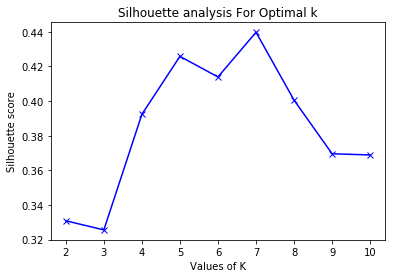

In [10]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []


for num_clusters in range_n_clusters:
 
    initial_centers = random_center_initializer(X, num_clusters, random_state=42).initialize()
    # instance created for respective distance metric
    instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(type_metric.EUCLIDEAN))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    #print(pyLabels)

    # silhouette score
    silhouette_avg.append(silhouette_score(X, labels=pyLabels, metric='euclidean', random_state=42))
    print("Silhouette score for cluster number "+str(num_clusters)+" : "+str(silhouette_score(X, labels=pyLabels, metric='euclidean', random_state=42)))
plt.plot(range_n_clusters,silhouette_avg,"bx-")
#print(silhouette_avg)
k_max = range_n_clusters[silhouette_avg.index(max(silhouette_avg))]
print("best K value: ", k_max)
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

> <b>So, we observed that at K=7 we get maximum Silhouette score as Euclidean distance as similarity measure.<b>

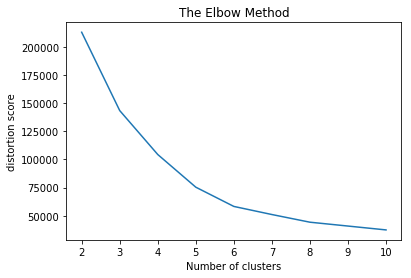

In [11]:
# checking K value by using k-means++
cs = []
for i in range(2, 11):
    k_means = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    k_means.fit(X)
    cs.append(k_means.inertia_)
plt.plot(range(2, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('distortion score')
plt.show()

> <b>So, we observed that after K=6 the loss is going to decrease by k-means++ algorithm<b>

In [12]:
# using best K
initial_centers = random_center_initializer(X, k_max, random_state=42).initialize()
# instance created for respective distance metric
instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(type_metric.EUCLIDEAN))
# perform cluster analysis
instanceKm.process()
# cluster analysis results - clusters and centers
pyClusters = instanceKm.get_clusters()
pyCenters = instanceKm.get_centers()
# enumerate encoding type to index labeling to get labels
pyEncoding = instanceKm.get_cluster_encoding()
pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
pyLabels = pyEncoder.set_encoding(0).get_clusters()

In [13]:
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(X)

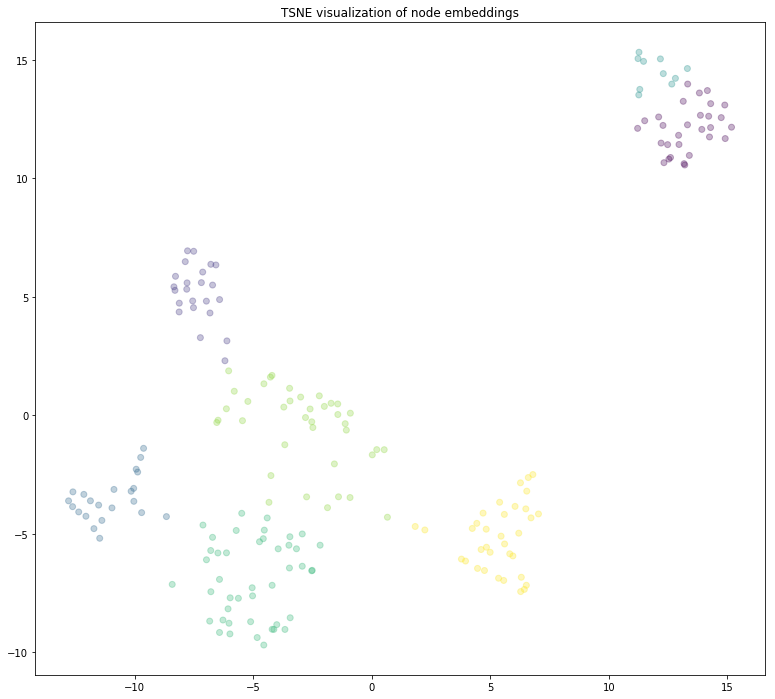

In [14]:
import numpy as np
%matplotlib inline
# draw the points

label_map = { l: i for i, l in enumerate(np.unique(pyLabels))}
node_colours = [ label_map[target] for target in pyLabels]

plt.figure(figsize=(16,12))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0], 
            node_embeddings_2d[:,1], 
            c=node_colours, alpha=0.3)
plt.title('{} visualization of node embeddings'.format(transform.__name__))

plt.show()

### b. Perform K-Means Clustering selecting the best value of k and taking Manhattan distance as similarity measure.

Silhouette score for cluster number 2 : 0.2944798191539823
Silhouette score for cluster number 3 : 0.2903942112903172
Silhouette score for cluster number 4 : 0.27519728821076556
Silhouette score for cluster number 5 : 0.27064324574321263
Silhouette score for cluster number 6 : 0.44746126655166435
Silhouette score for cluster number 7 : 0.39581378268371586
Silhouette score for cluster number 8 : 0.407493561986142
Silhouette score for cluster number 9 : 0.36854008060910737
Silhouette score for cluster number 10 : 0.3739883593755859
best K value:  6


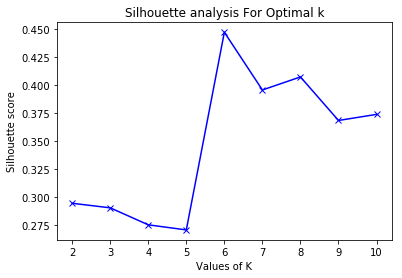

In [15]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []


for num_clusters in range_n_clusters:
 
    initial_centers = random_center_initializer(X, num_clusters, random_state=42).initialize()
    # instance created for respective distance metric
    instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(type_metric.MANHATTAN))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    #print(pyLabels)

    # silhouette score
    silhouette_avg.append(silhouette_score(X, labels=pyLabels, metric='euclidean', random_state=42))
    print("Silhouette score for cluster number "+str(num_clusters)+" : "+str(silhouette_score(X, labels=pyLabels, metric='euclidean', random_state=42)))
plt.plot(range_n_clusters,silhouette_avg,"bx-")
#print(silhouette_avg)
k_max = range_n_clusters[silhouette_avg.index(max(silhouette_avg))]
print("best K value: ", k_max)
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

> <b>So, we observed that at K=6 we get maximum Silhouette score as Manhattan distance as similarity measure.<b>

In [16]:
# using best K
initial_centers = random_center_initializer(X, k_max, random_state=42).initialize()
# instance created for respective distance metric
instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(type_metric.EUCLIDEAN))
# perform cluster analysis
instanceKm.process()
# cluster analysis results - clusters and centers
pyClusters = instanceKm.get_clusters()
pyCenters = instanceKm.get_centers()
# enumerate encoding type to index labeling to get labels
pyEncoding = instanceKm.get_cluster_encoding()
pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
pyLabels = pyEncoder.set_encoding(0).get_clusters()

In [17]:
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(X)

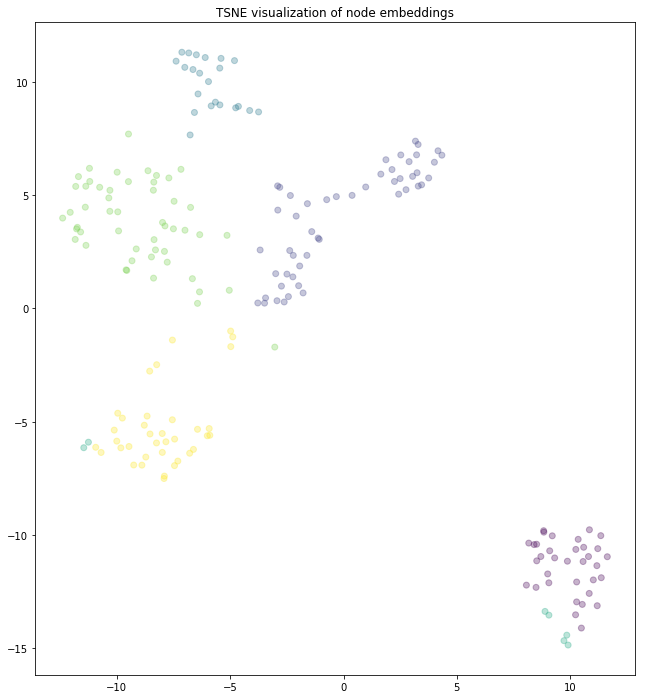

In [18]:
import numpy as np
%matplotlib inline
# draw the points

label_map = { l: i for i, l in enumerate(np.unique(pyLabels))}
node_colours = [ label_map[target] for target in pyLabels]

plt.figure(figsize=(16,12))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0], 
            node_embeddings_2d[:,1], 
            c=node_colours, alpha=0.3)
plt.title('{} visualization of node embeddings'.format(transform.__name__))

plt.show()